# Problem Statement: Income Prediction
In this case study, we will build a decision tree to predict the income of a given population, which is labelled as <=50Kand >50K. The attributes (predictors) are age, working class type, marital status, gender, race etc.

In the following sections, we'll:
• clean and prepare the data,
• build a decision tree with default hyperparameters,
• understand all the hyperparameters that we can tune, and finally
• choose the optimal hyperparameters using grid search cross-validation.
• Pruning

# Understanding and Cleaning the Data:

In [1]:
# Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the csv file:
df = pd.read_csv("Income_Prediction.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
# Let's understand the type of values in each columns of our dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Dict:
1 age: Age of an individual
2. workclass: Individual work category
3. fnlwgt: final weight
4. education: the highest level of education achieved by an individual 
5. education.num: The highest level of education achieved in numerical form
6. marital.status: marital status of an individual
7. occupation: the general type of occupation of an individual
8. relationship: represents what this individual is relative to others 
9. race: Descriptions of an individual's race.
10. sex: the biological sex of the individual.
11. capital.gain: capital gains for an individual
12. capital.loss: capital loss for an individual
13. hours.per.week: the hours an individual has reported to work per week
14. native.country: country of origin for an individual
15. income: whether or not an individual makes more than $50,000 annually <=50k, >50k

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('********************************')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
********************************
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
********************************
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
********************************
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           33

In [6]:
# dropping the rows having missing values in workclass:
df = df[df["workclass"] != "?"]
df = df[df["occupation"] != "?"]
df = df[df["native.country"] != "?"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Data Preparation:
numcol = []
catcol = []

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catcol.append(i)
    else:
        numcol.append(i)

In [9]:
numcol

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [10]:
catcol

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [11]:
# Changing the Categorical column to Numerical Column by Encoding:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[catcol] = oe.fit_transform(df[catcol])

In [12]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0,0.0
3,54,2.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0,0.0
4,41,2.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0,0.0
5,34,2.0,216864,11.0,9,0.0,7.0,4.0,4.0,0.0,0,3770,45,38.0,0.0
6,38,2.0,150601,0.0,6,5.0,0.0,4.0,4.0,1.0,0,3770,40,38.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0,0.0
32557,27,2.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32558,40,2.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32559,58,2.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  int64  
 1   workclass       30162 non-null  float64
 2   fnlwgt          30162 non-null  int64  
 3   education       30162 non-null  float64
 4   education.num   30162 non-null  int64  
 5   marital.status  30162 non-null  float64
 6   occupation      30162 non-null  float64
 7   relationship    30162 non-null  float64
 8   race            30162 non-null  float64
 9   sex             30162 non-null  float64
 10  capital.gain    30162 non-null  int64  
 11  capital.loss    30162 non-null  int64  
 12  hours.per.week  30162 non-null  int64  
 13  native.country  30162 non-null  float64
 14  income          30162 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 3.7 MB


In [14]:
# Converting target variable income to categorical:
df["income"] = df["income"].astype("category")

# Model Building and Evaluation

In [15]:
# Building a decision tree with default parameter and then will use cross-validation to tune them

In [16]:
# Putting features variable to x and target variable to y:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
x

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,2.0,132870,11.0,9,6.0,3.0,1.0,4.0,0.0,0,4356,18,38.0
3,54,2.0,140359,5.0,4,0.0,6.0,4.0,4.0,0.0,0,3900,40,38.0
4,41,2.0,264663,15.0,10,5.0,9.0,3.0,4.0,0.0,0,3900,40,38.0
5,34,2.0,216864,11.0,9,0.0,7.0,4.0,4.0,0.0,0,3770,45,38.0
6,38,2.0,150601,0.0,6,5.0,0.0,4.0,4.0,1.0,0,3770,40,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2.0,310152,15.0,10,4.0,10.0,1.0,4.0,1.0,0,0,40,38.0
32557,27,2.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0
32558,40,2.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0
32559,58,2.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0


In [18]:
y

1        0.0
3        0.0
4        0.0
5        0.0
6        0.0
        ... 
32556    0.0
32557    0.0
32558    1.0
32559    0.0
32560    0.0
Name: income, Length: 30162, dtype: category
Categories (2, float64): [0.0, 1.0]

In [19]:
# Importing the train_test_Split
from sklearn.model_selection import train_test_split

In [20]:
# Splitting the data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
# Importing Decision Tree Classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree with default parameters, except depth for the visualization of the tree
dt_default = DecisionTreeClassifier(max_depth=5)

# Fitting decision tree on train and test data:
dt_default.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [22]:
# Evaluating metrics for the default model

In [23]:
# Importing classification report and confusion matrix from sklearn.metrics
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score

# Making predictions
ypred_default = dt_default.predict(xtest)

# Predicting Classification report:
cm=confusion_matrix(ytest,ypred_default)
cr=classification_report(ytest,ypred_default)
ac=accuracy_score(ytest,ypred_default)

print(f'{cm}\n {cr}\n Accuracy{ac}')

[[6470  311]
 [1097 1171]]
               precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      6781
         1.0       0.79      0.52      0.62      2268

    accuracy                           0.84      9049
   macro avg       0.82      0.74      0.76      9049
weighted avg       0.84      0.84      0.83      9049

 Accuracy0.8444026964305448


<Figure size 800x600 with 0 Axes>

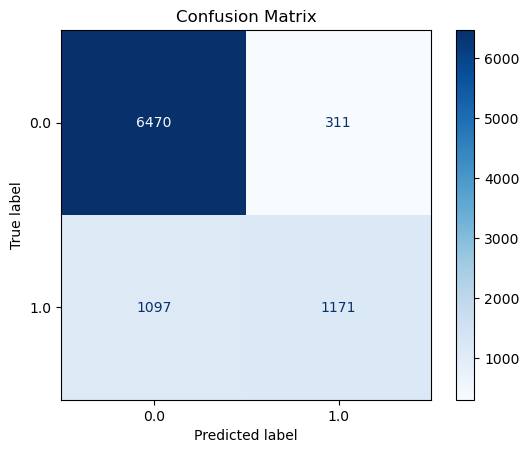

In [24]:
plt.figure(figsize=(8, 6))
plot_confusion_matrix(dt_default, xtest, ytest, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Plotting the Decisoion Tree for the default parameter:

In [26]:
# Importing required packages for visualization
from sklearn import tree

# Putting all feature names in a list
features = list(df.columns[1:])

# Putting all classes in a list i.e. >=50 and <=50
cls = [">50","<=50"]

In [27]:
# Printing feature names:
print(features)

print("----------------------------------")

# Printing classes names:
print(cls)

['workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']
----------------------------------
['>50', '<=50']


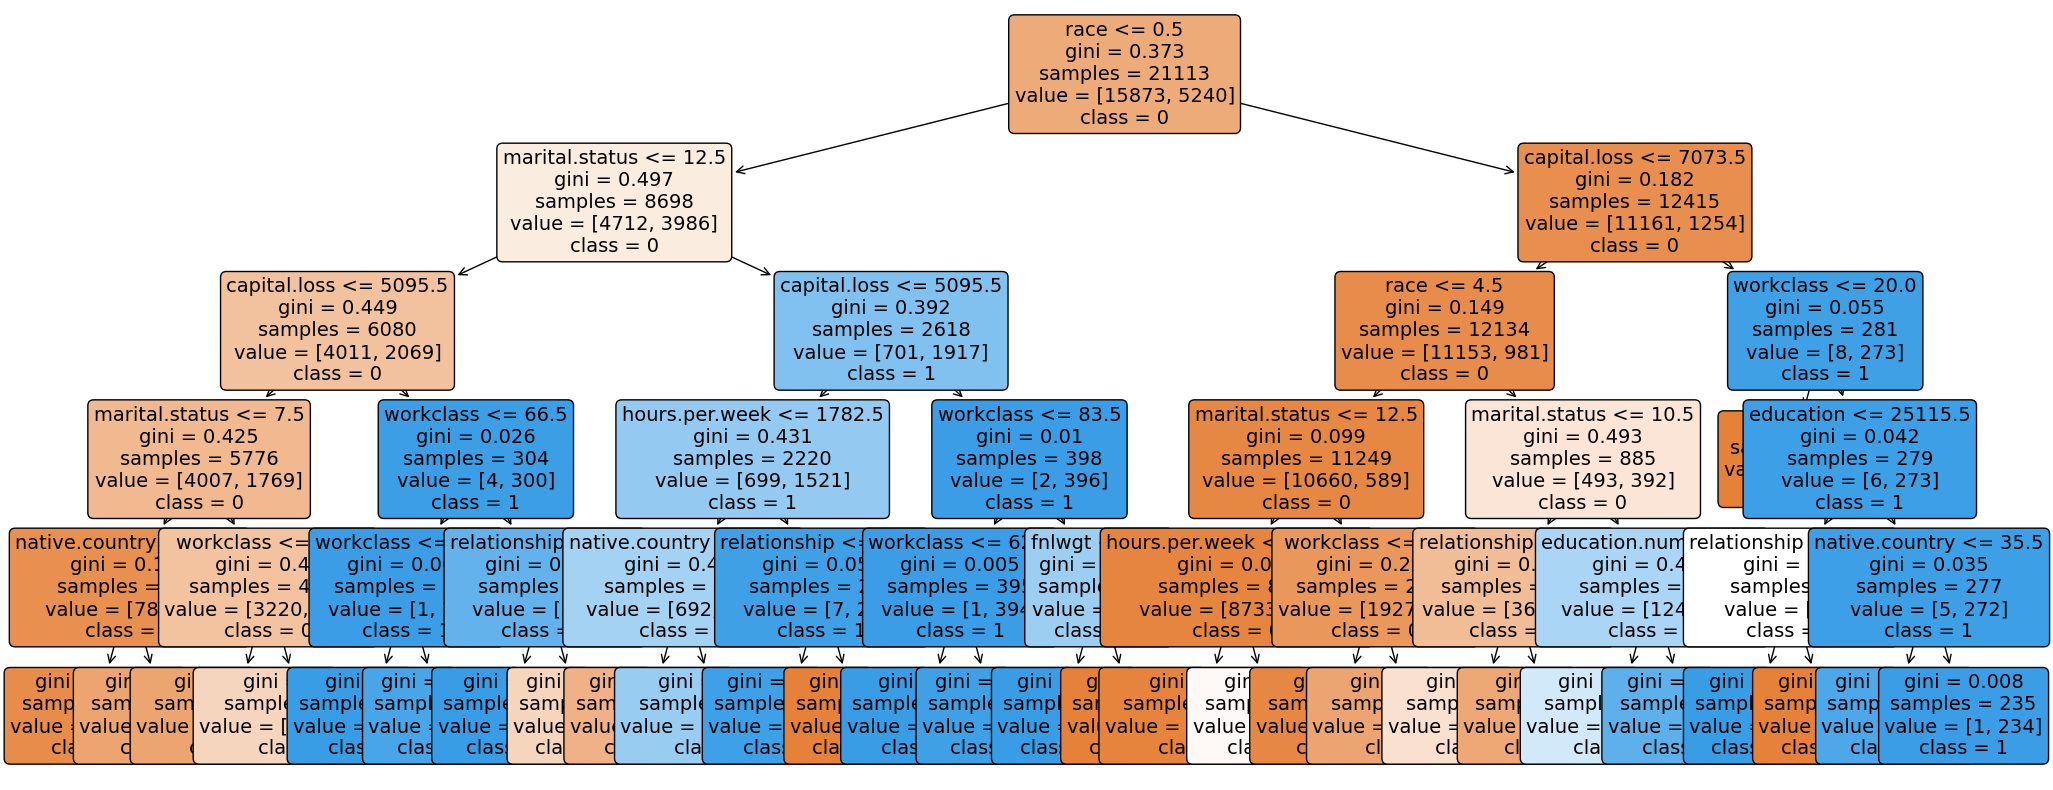

In [28]:
# Plotting our decision tree for max_depth=3
plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree(dt_default,feature_names=features,class_names=["0","1"],filled=True,rounded=True,fontsize=14)

In [29]:
# Print textual representation of a tree:
text_representation = tree.export_text(dt_default)
print(text_representation)

|--- feature_7 <= 0.50
|   |--- feature_4 <= 12.50
|   |   |--- feature_10 <= 5095.50
|   |   |   |--- feature_4 <= 7.50
|   |   |   |   |--- feature_12 <= 49.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_12 >  49.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  7.50
|   |   |   |   |--- feature_0 <= 35.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_0 >  35.50
|   |   |   |   |   |--- class: 0.0
|   |   |--- feature_10 >  5095.50
|   |   |   |--- feature_0 <= 66.50
|   |   |   |   |--- feature_0 <= 61.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_0 >  61.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  66.50
|   |   |   |   |--- feature_6 <= 6.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  6.50
|   |   |   |   |   |--- class: 0.0
|   |--- feature_4 >  12.50
|   |   |--- feature_10 <= 5095.50
|   |   |   |--- feature_11 <= 1782.50
|   |   |   |   |--- featur

# Hyperparamter Tuning

# GridSearchCV to find optimal max_depth

In [30]:
# Import DecisionTreeClassifier, KFold, and GridSearchCV from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV

# specifying the number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {"max_depth": range(1, 40)}

# instantiate the model (DecisionTreeClassifier) with criteria gini and random_state as 100
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)

# instantiate GridSearchCV with above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# fit the tree on training data
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [31]:
# scores of GridSearch CV 
scores = tree.cv_results_

#Check the scores in a dataframe (here just printing first 5 rows) 
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015491,1.339886e-03,0.002993,0.001995,1,{'max_depth': 1},0.751835,0.751835,0.751835,0.751776,...,0.751812,0.000029,39,0.751806,0.751806,0.751806,0.751820,0.751820,0.751812,0.000007
1,0.021281,6.279292e-03,0.000799,0.000978,2,{'max_depth': 2},0.813876,0.823585,0.825243,0.823780,...,0.821958,0.004096,17,0.823979,0.821551,0.821137,0.821503,0.821621,0.821958,0.001024
2,0.015622,8.529922e-07,0.000000,0.000000,3,{'max_depth': 3},0.826427,0.837556,0.839451,0.838702,...,0.835978,0.004824,11,0.838484,0.835702,0.835228,0.835297,0.835652,0.836073,0.001220
3,0.031243,3.483197e-06,0.000000,0.000000,4,{'max_depth': 4},0.830689,0.840635,0.842292,0.845097,...,0.840051,0.004913,8,0.842806,0.840320,0.842925,0.839204,0.840092,0.841070,0.001514
4,0.037491,7.652397e-03,0.000000,0.000000,5,{'max_depth': 5},0.835188,0.845371,0.847265,0.846992,...,0.844504,0.004724,5,0.846359,0.845411,0.847780,0.842224,0.847789,0.845912,0.002053


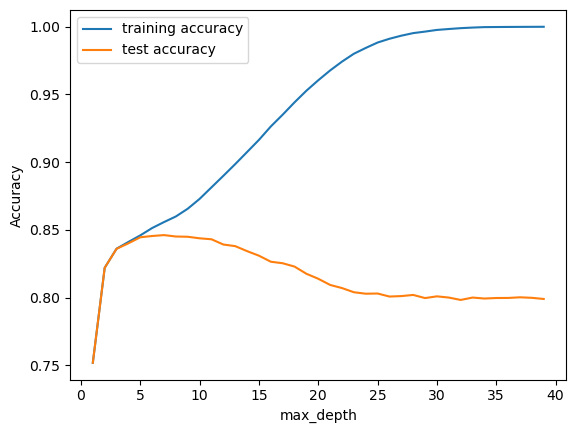

In [32]:
# plotting accuracies with max_depth vs mean train and test scores 
plt.figure()
plt.plot(scores ["param_max_depth"], scores ["mean_train_score"], label="training accuracy") 
plt.plot(scores ["param_max_depth"], scores ["mean_test_score"], label="test accuracy") 
plt.xlabel("max_depth") 
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_leaf

In [33]:
# Import DecisionTreeClassifier and GridSearchCV from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# specify the number of folds for k-fold CV (here 5)
n_folds = 5

# parameters to build the model on, using min_samples_leaf with a range from 5 to 200 with a step of 20
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)

# instantiate GridSearchCV with the above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# fit the tree on training data
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [34]:
# scores of GridSearch CV 
scores = tree.cv_results_

#Check the scores in a dataframe (here just printing first 5 rows) 
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080045,0.003860,0.000399,0.000798,5,{'min_samples_leaf': 5},0.812456,0.824296,0.822875,0.822833,...,0.820442,0.004260,10,0.913795,0.912315,0.912315,0.913859,0.913859,0.913229,0.000747
1,0.062484,0.000004,0.000000,0.000000,25,{'min_samples_leaf': 25},0.841108,0.846555,0.843950,0.841781,...,0.844219,0.002580,6,0.868561,0.869509,0.868443,0.868628,0.868747,0.868778,0.000379
2,0.062615,0.009895,0.003123,0.006245,45,{'min_samples_leaf': 45},0.844423,0.847265,0.848212,0.844150,...,0.847819,0.003941,1,0.862522,0.862404,0.860687,0.858564,0.861761,0.861187,0.001465
3,0.048409,0.007674,0.009374,0.007654,65,{'min_samples_leaf': 65},0.841582,0.839924,0.846791,0.846281,...,0.845309,0.004251,5,0.858319,0.857490,0.857490,0.856847,0.856492,0.857327,0.000627
4,0.053109,0.007654,0.003126,0.006251,85,{'min_samples_leaf': 85},0.840398,0.846318,0.843476,0.850545,...,0.846919,0.004818,2,0.855832,0.854174,0.856306,0.854597,0.855308,0.855243,0.000780


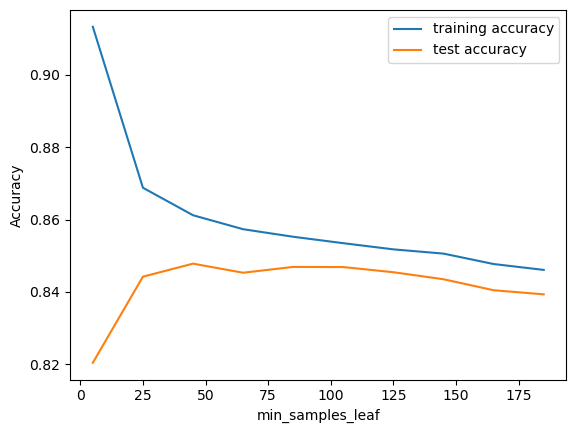

In [35]:
#plotting accuracies with min_samples_leaf vs mean train and test accuracy
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy") 
plt.plot(scores ["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Tuning min_samples_split

In [36]:
# Import DecisionTreeClassifier and GridSearchCV from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# specify the number of folds for k-fold CV (here 5)
n_folds = 5

# parameters to build the model on (here just min_samples_split with range 5 to 200 with step size as 20)
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model (DecisionTreeClassifier)
dtree = DecisionTreeClassifier(criterion="gini", random_state=100)

# instantiate GridSearchCV with the above 3 parameters and scoring will be accuracy, while return_train_score as true
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy", return_train_score=True)

# fitting the above tree on training data
tree.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [37]:
# scores of GridSearch CV 
scores = tree.cv_results_

#Check the scores in a dataframe (here just printing first 5 rows) 
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.079792,0.003354,0.003125,0.006250,5,{'min_samples_split': 5},0.808904,0.804878,0.804641,0.804595,...,0.806138,0.001801,10,0.967496,0.970634,0.968028,0.967616,0.969510,0.968657,0.001222
1,0.074976,0.006246,0.003125,0.006249,25,{'min_samples_split': 25},0.822875,0.824769,0.835188,0.826149,...,0.827358,0.004237,9,0.906098,0.907401,0.906868,0.907939,0.904387,0.906539,0.001236
2,0.069876,0.008446,0.003723,0.006062,45,{'min_samples_split': 45},0.827848,0.835662,0.837556,0.844387,...,0.836357,0.005269,8,0.890468,0.891948,0.889343,0.889053,0.889290,0.890020,0.001081
3,0.071849,0.007663,0.003125,0.006250,65,{'min_samples_split': 65},0.838740,0.835425,0.840161,0.845334,...,0.840715,0.003571,7,0.881587,0.884192,0.881291,0.881002,0.881653,0.881945,0.001147
4,0.062489,0.000013,0.000000,0.000000,85,{'min_samples_split': 85},0.842529,0.835899,0.845134,0.848887,...,0.844314,0.004873,6,0.877146,0.879515,0.876791,0.876265,0.876857,0.877315,0.001136


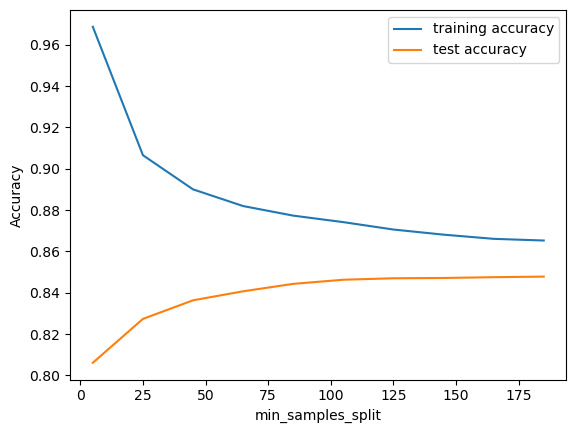

In [38]:
# plotting accuracies with min_samples_split vs mean train and test accuracy

plt.figure()
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
         label="training accuracy")

plt.plot(scores["param_min_samples_split"],
         scores["mean_test_score"],
         label="test accuracy")

plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()  
plt.show()

# Grid Search to find Optimal Hyperparameter

In [39]:
# Create the parameter grid (Already defined above)
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# no. of folds (5)
n_folds = 5

# Instantiate the grid search model with default parameters value
dtree = DecisionTreeClassifier(random_state=1)  

# instantiate GridSearchCV with above 3 parameters and verbose as 1
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=n_folds, verbose=1)

# Fit the grid search to the data
grid_search.fit(xtrain, ytrain)  

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [40]:
# cv results:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042260,0.007065,0.001198,0.001467,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.835662,0.843476,0.843003,0.843439,0.843202,0.841756,0.003052,15
1,0.035311,0.006054,0.003125,0.006250,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.835662,0.843476,0.843003,0.843439,0.843202,0.841756,0.003052,15
2,0.037492,0.007655,0.003124,0.006248,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.835662,0.843476,0.843003,0.847466,0.843202,0.842562,0.003824,13
3,0.034367,0.006247,0.003124,0.006249,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.835662,0.843476,0.843003,0.847466,0.843202,0.842562,0.003824,13
4,0.054041,0.008911,0.003123,0.006246,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.844187,0.845844,0.845334,0.854571,0.847014,0.003817,5
5,0.061586,0.008280,0.000597,0.001195,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.844187,0.845844,0.845334,0.854571,0.847014,0.003817,5
6,0.056237,0.007641,0.000000,0.000000,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844187,0.843950,0.847502,0.849834,0.851966,0.847488,0.003130,1
7,0.056244,0.007647,0.003125,0.006249,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.844187,0.843950,0.847502,0.849834,0.851966,0.847488,0.003130,1
8,0.031243,0.000001,0.000000,0.000000,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.845371,0.847028,0.847466,0.847939,0.844409,0.005157,11
9,0.031243,0.000023,0.000000,0.000000,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.845371,0.847028,0.847466,0.847939,0.844409,0.005157,11


In [41]:
# printing the optimal accuracy score 
print("best accuracy", grid_search.best_score_)

#Printing best hyperparameters parameters & its values
print (grid_search.best_params_)

best accuracy 0.8474876533315058
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}


# Running the model with best parameters obtained from grid search

In [42]:
# model with optimal hyperparameters also add random state as 100
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=10,
                                  min_samples_leaf=50, min_samples_split=50)

# fitting the above model with training data
clf_gini.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=1)

In [43]:
# accuracy score:
clf_gini.score(xtest,ytest)

0.850259697204111

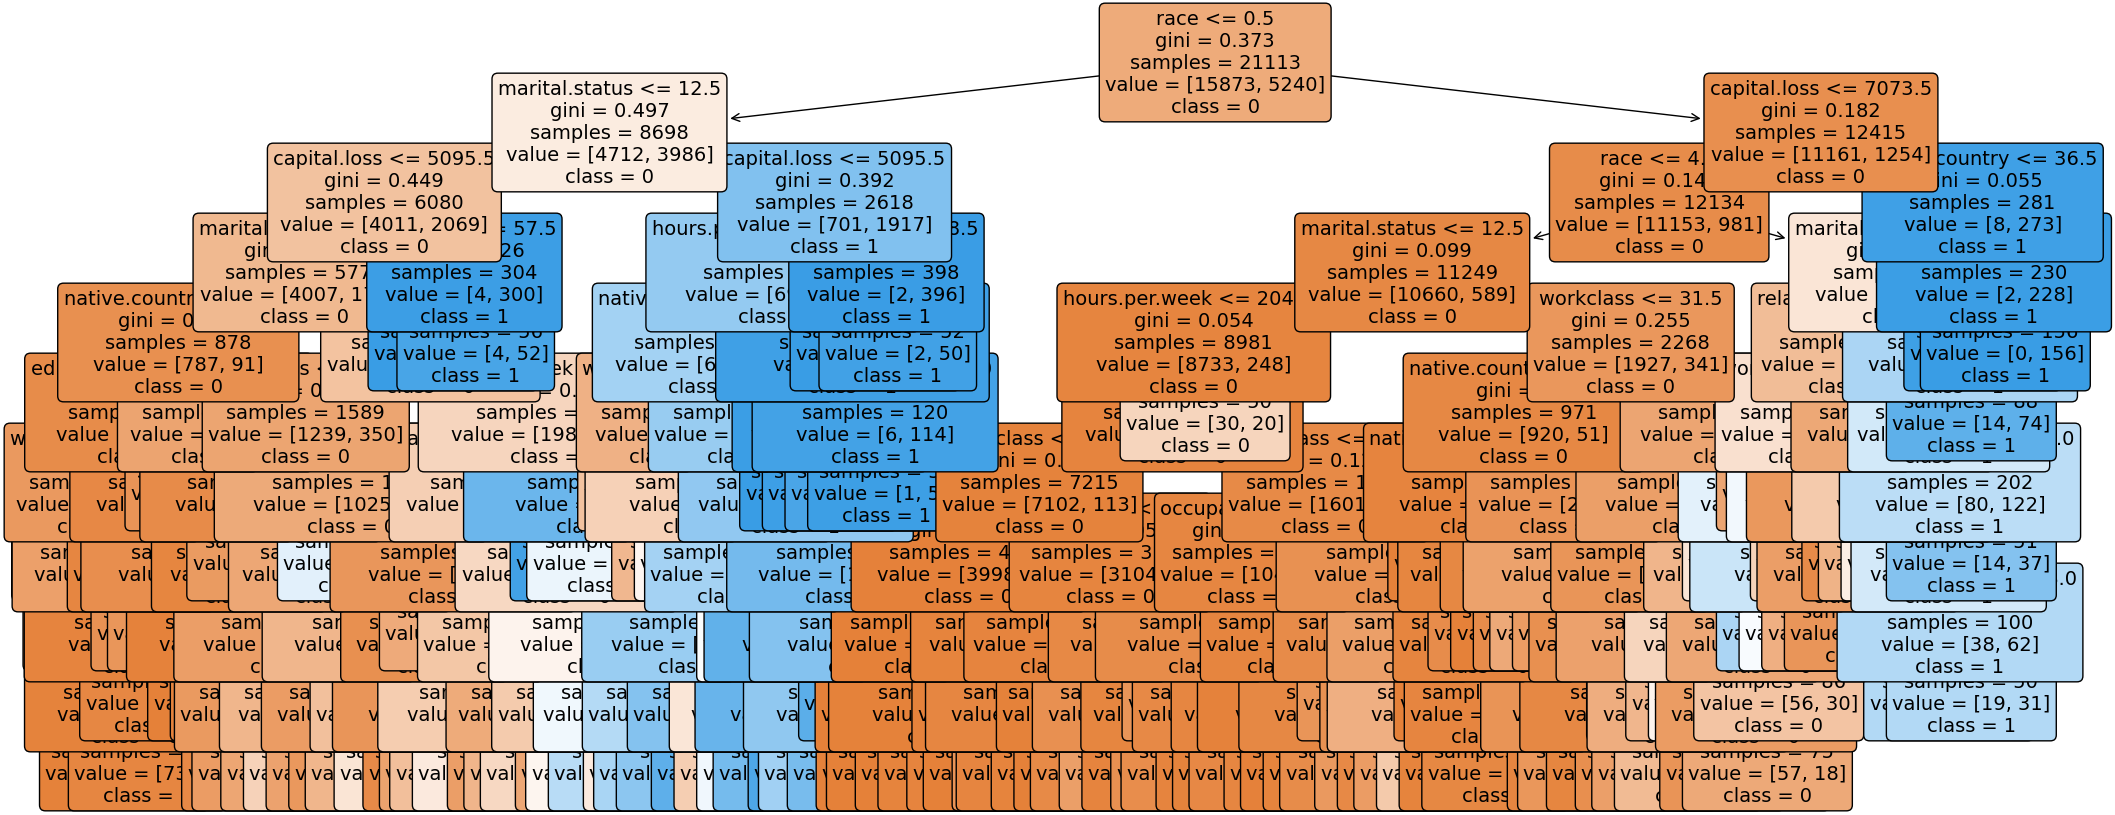

In [44]:
# Importing required packages for visualization 
from sklearn import tree

# plotting the tree 
plt.figure(figsize=(25,10))
plt.tight_layout()

a = tree.plot_tree(clf_gini,feature_names=features,
                   class_names=["0","1"], filled=True, 
                   rounded=True, fontsize=14)

In [45]:
# tree with max_depth = 3
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3,
                                  min_samples_leaf=50,min_samples_split=50)

# fitting the model with training data 
clf_gini.fit(xtrain,ytrain)

# Print model score 
print (clf_gini.score (xtest,ytest))

0.8356724499944745


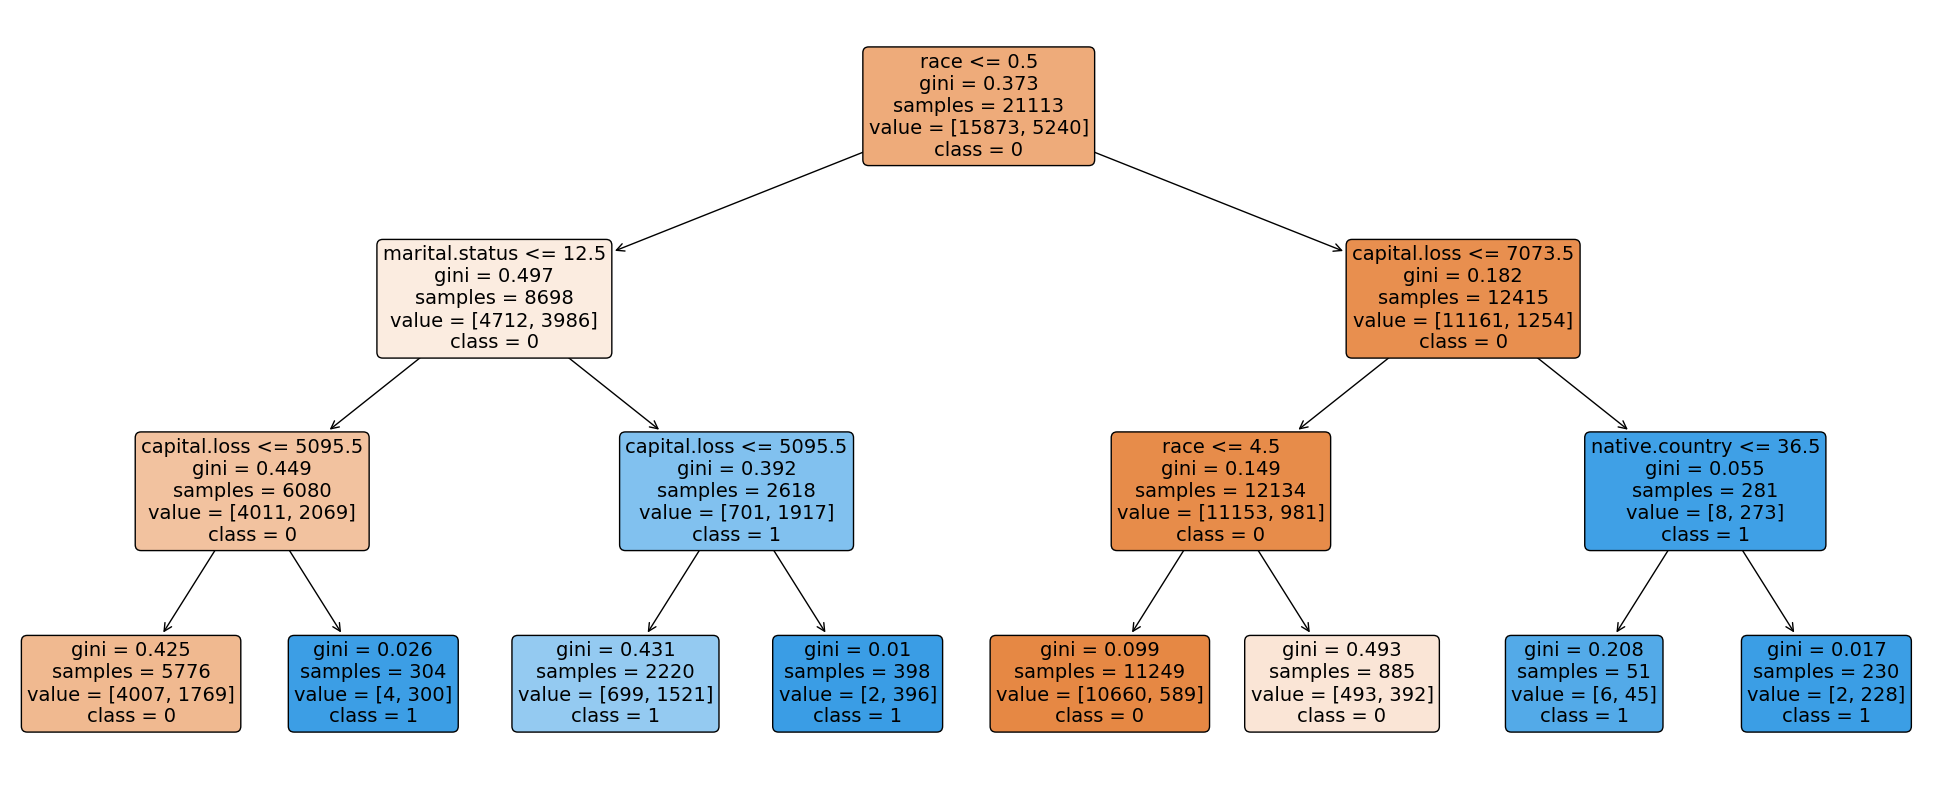

In [46]:
# plotting tree with max_depth=3
plt.figure(figsize=(25,10))
plt.tight_layout()
a = tree.plot_tree(clf_gini,feature_names=features, 
                  class_names=["0","1"], filled=True, 
                  rounded=True, fontsize=14)

In [47]:
# Import classification_report and confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data 
ypred = clf_gini.predict(xtest)

# print matrix of classification_report
print (classification_report (ytest, ypred))

              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      6781
         1.0       0.78      0.48      0.59      2268

    accuracy                           0.84      9049
   macro avg       0.81      0.72      0.74      9049
weighted avg       0.83      0.84      0.82      9049



[[6483  298]
 [1189 1079]]


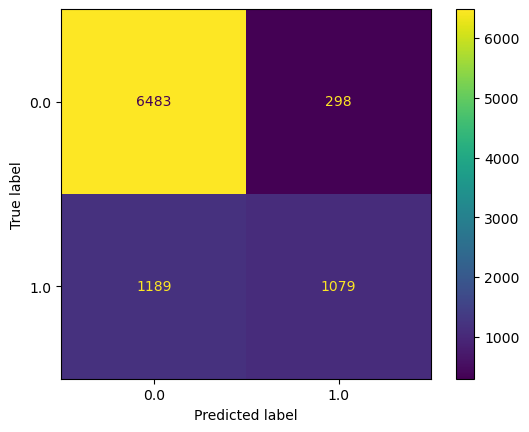

In [48]:
# Print confusion matrix 
print(confusion_matrix (ytest,ypred)) 
#plot confusion matrix 
plot_confusion_matrix(clf_gini, xtest, ytest) 
plt.show()

# Pruning in Decision Tree

In [49]:
#Initialise cost_complexity_pruning path with training data 
path = clf_gini.cost_complexity_pruning_path(xtrain,ytrain) 

#Checing out ccp_alphas and impurities 
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [50]:
# Printing all alphas
ccp_alphas

array([0.00000000e+00, 4.69393881e-05, 3.06916820e-03, 1.18562680e-02,
       1.26715271e-02, 2.06390642e-02, 2.66304272e-02, 6.18391639e-02])

In [51]:
# Initialise empty lists for train and test accuracy
Accuracy_Train, Accuracy_Test = [], []

# Iterate over ccp_alpha
for ccp_alpha in ccp_alphas:  
    
    # Instantiate DecisionTreeClassifier with random_state=0 and ccp_alpha as the ccp_alpha iterated value
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    
    # Fitting the model on training data
    clf.fit(xtrain, ytrain)
    
    # Predicting on train data
    Train_pred = clf.predict(xtrain) 
    
    # Predicting on test data
    Test_pred = clf.predict(xtest)  
    
    # Appending training accuracy
    Accuracy_Train.append(accuracy_score(ytrain, Train_pred))  
    
    # Appending test accuracy
    Accuracy_Test.append(accuracy_score(ytest, Test_pred))  

<Figure size 1000x400 with 0 Axes>

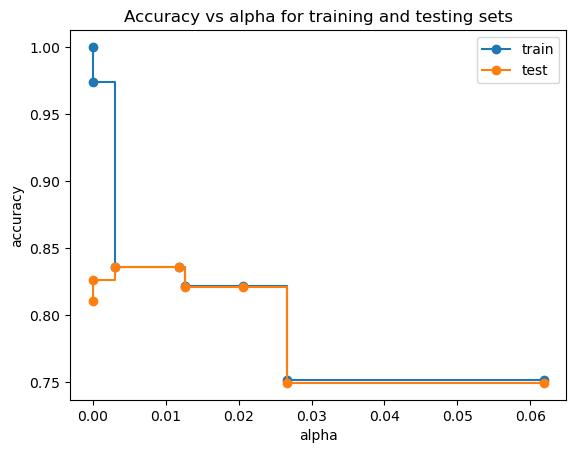

In [52]:
train_scores = Accuracy_Train
test_scores =Accuracy_Test

plt.figure(figsize=(10,4))

fig, ax = plt.subplots() 
ax.set_xlabel("alpha") 
ax.set_ylabel("accuracy") 
ax.set_title("Accuracy vs alpha for training and testing sets") 
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [53]:
#Instantiate DecisionTreeClassifier
final_dt=DecisionTreeClassifier(ccp_alpha=0.01, random_state=1, max_depth=3,
                                min_samples_leaf=50,min_samples_split=50)

#Fitting model on training data 
final_dt.fit(xtrain, ytrain)

#Predicting on train data 
Train_pred=final_dt.predict(xtrain)

#Predicting on test data 
Test_pred=final_dt.predict(xtest)

# Print final test and train accuracy
print (accuracy_score(ytrain, Train_pred)) 
print (accuracy_score(ytest, Test_pred))

0.8359778335622602
0.8356724499944745


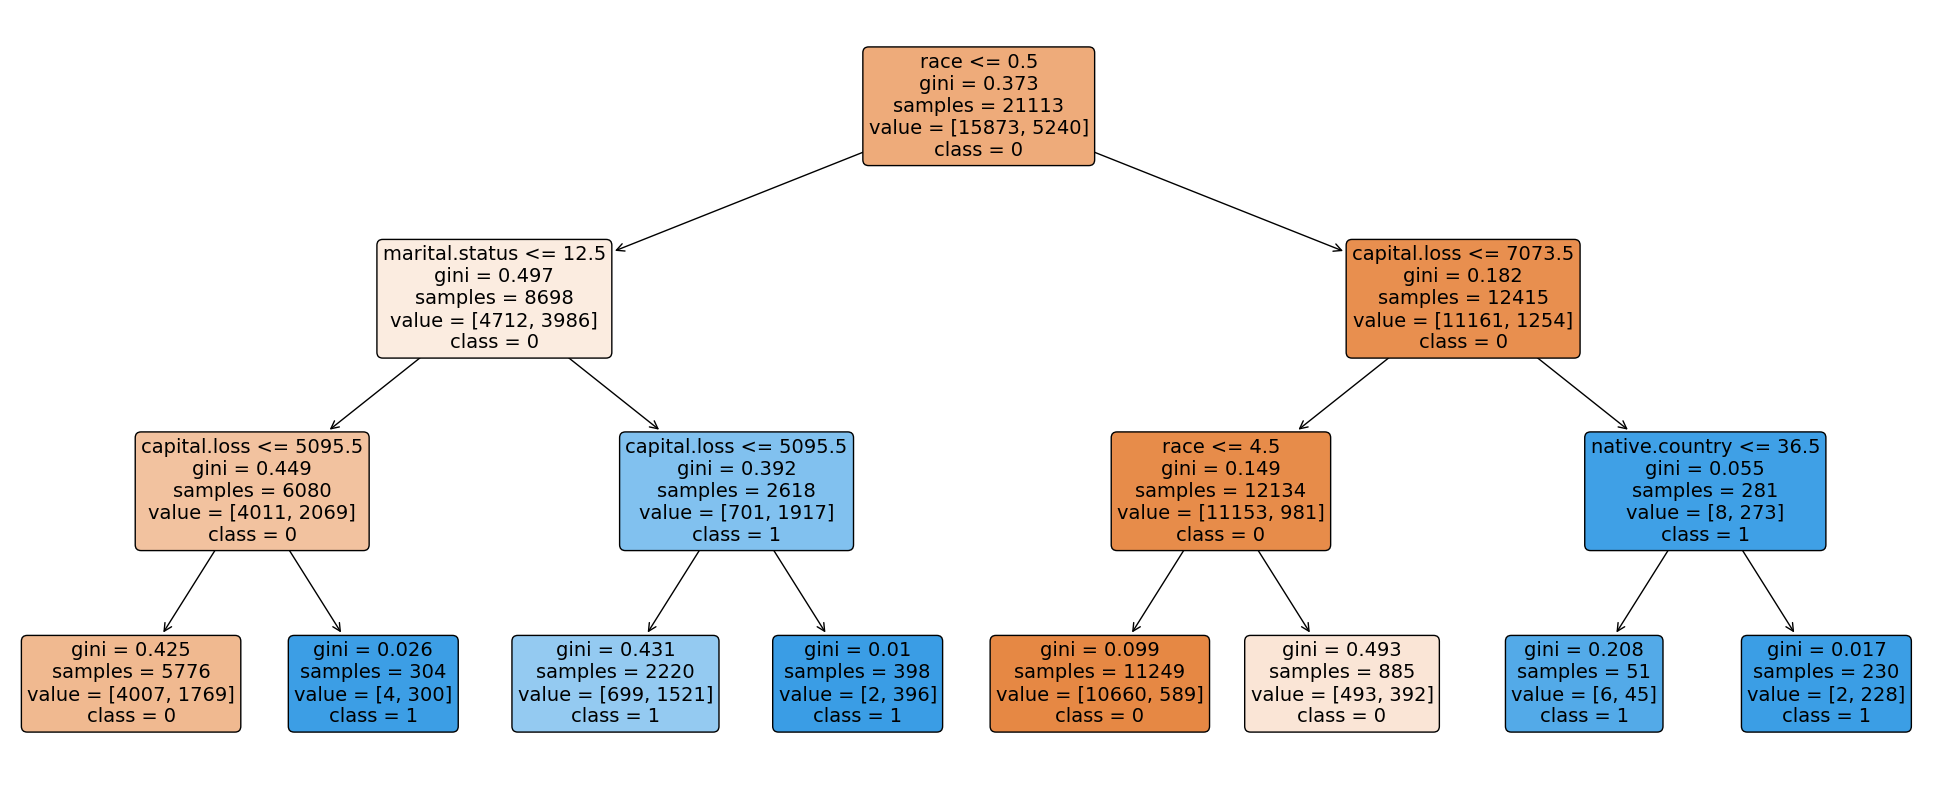

In [54]:
# plotting tree.
plt.figure(figsize=(25,10))

plt.tight_layout()
a = tree.plot_tree (clf_gini,feature_names=features, 
                    class_names=["0","1"], filled=True, 
                    rounded=True,fontsize=14)

# Conclusion:
1. Decision trees assist analysts in evaluating upcoming choices. The tree creates a visual representation of all possible outcomes, rewards and follow-up decisions in one document.

2. Each subsequent decision resulting from the original choice is also depicted on the tree, so you can see the overall effect of any one decision.

3. As you go through the tree and make choices, you will see a specific path from one node to another and the impact a decision made now could have down the road.

# Summary:
1. Decision trees are composed of three main parts-decision nodes i.e denoting choice,denoting probability and denoting outcomes

2. Decision trees can be used to deal with complex datasets, and can be pruned if necessary to avoid overfitting. 

3. Despite having many benefits, decision trees are not suited to all types of data, e.g. continuous variables or imbalanced datasets.

4. They are popular in data analytics and machine learning, with practical applications across sectors from health, to finance, and technology.